# 1.二进制产生的误差
### 代码：


In [2]:
import numpy as np
a=0
for i in range(1,1001):
    a=a+0.1
a=a-100
print(a)

-1.4068746168049984e-12


### 原因：
  计算机所使用的是二进制01代码。在计算十进制数值时，计算机将其转换为二进制数值后进行计算：对整数部分进行“除二取余”得到精确的数值，对小数部分进行“乘二取整”从而可能得到无限循环的二进制数值。因此在处理浮点数时，计算机的运算会得到误差。

# 2.数值稳定性
### 代码：

[19.86924155+0.48302236j 19.86924155-0.48302236j 17.87639325+1.5256903j
 17.87639325-1.5256903j  15.40180719+1.75012577j 15.40180719-1.75012577j
 13.12693854+1.27481446j 13.12693854-1.27481446j 11.25116964+0.45773341j
 11.25116964-0.45773341j  9.94365233+0.j          9.00532138+0.j
  7.99996232+0.j          6.99996   +0.j          6.00000372+0.j
  4.99999993+0.j          3.99999999+0.j          3.        +0.j
  2.        +0.j          1.        +0.j        ]
[19.95093687+0.j         19.23376981+0.j         17.66262185+0.70453172j
 17.66262185-0.70453172j 15.45833811+0.90039246j 15.45833811-0.90039246j
 13.34913778+0.53646905j 13.34913778-0.53646905j 11.83041674+0.j
 11.05100728+0.j          9.99332671+0.j          9.00019746+0.j
  8.0002056 +0.j          6.99993395+0.j          6.00001114+0.j
  4.99999891+0.j          4.00000005+0.j          3.        +0.j
  2.        +0.j          1.        +0.j        ]
[19.99546545 19.0311922  17.87642992 17.20762366 15.60815435 15.38848845
 13.7856

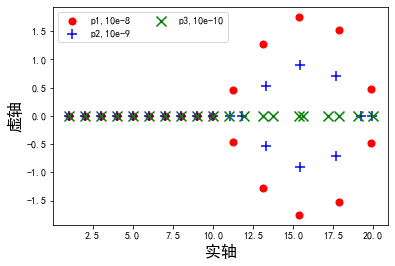

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A=np.array(np.arange(1,21))
p=np.poly1d(A,True)
#print(p)
r=np.roots(p)
#print(r)

epsilon=1e-8
B=np.array(np.zeros(21))
B[1]=epsilon
p1=p+np.poly1d(B)
#print(p1)
r1=np.roots(p1)
print(r1)

epsilon=1e-9
B[1]=epsilon
p2=p+np.poly1d(B)
#print(p2)
r2=np.roots(p2)
print(r2)

epsilon=1e-10
B[1]=epsilon
p3=p+np.poly1d(B)
#print(p3)
r3=np.roots(p3)
print(r3)

plt.figure()
x1=np.real(r1)
x2=np.real(r2)
x3=np.real(r3)
y1=np.imag(r1)
y2=np.imag(r2)
y3=np.imag(r3)
plt.scatter(x1,y1, c='red', s=50, label='p1,10e-8')
plt.scatter(x2,y2, c="b",marker="+",s=100, label='p2,10e-9')
plt.scatter(x3,y3, c="g",marker="x", s=100, label='p3,10e-10')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("实轴", fontdict={'size': 16})
plt.ylabel("虚轴", fontdict={'size': 16})
plt.legend(['p1,10e-8','p2,10e-9','p3,10e-10'],ncol=2,frameon=True)
plt.show()

r1、r2、r3分别为进行三次大小为10e-8、10e-9、10e-10的扰动的多项式求解后的根。  
分别用红色的圆、蓝色的+、绿色的x在图中表示其根的位置。

# 3.数值计算与符号计算
### 代码：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *
x=sympy.Symbol("x")

A=np.arange(1,21,1)
p=np.poly1d(A,True)
A=p.coeffs
#print(A)

A1=1*A
A1[1]=A1[1]+1.0e-8
#print(A1)
y1=0
for i in range(21):
    y1=y1+x**i*A[20-i]
r1=sympy.solve(y1,x)
print(r1)

A2=1*A
A2[1]=A2[1]+1.0e-9
#print(A2)
y2=0
for i in range(21):
    y2=y2+x**i*A[20-i]
r2=sympy.solve(y2,x)
print(r2)

A3=1*A
A3[1]=A3[1]+1.0e-10
#print(A3)
y3=0
for i in range(21):
    y3=y3+x**i*A[20-i]
r3=sympy.solve(y3,x)
print(r3)


r1、r2、r3分别为进行三次大小为10e-8、10e-9、10e-10的扰动的多项式求解后的根。  
且用solve函数求解起来（即符号计算）时间远远大于数值计算。

In [ ]:
plt.figure()
x1=np.real(r1)
x2=np.real(r2)
x3=np.real(r3)
y1=np.imag(r1)
y2=np.imag(r2)
y3=np.imag(r3)
plt.scatter(x1,y1, c='red', s=50, label='p1,10e-8')
plt.scatter(x2,y2, c="b",marker="+",s=100, label='p2,10e-9')
plt.scatter(x3,y3, c="g",marker="x", s=100, label='p3,10e-10')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("实轴", fontdict={'size': 16})
plt.ylabel("虚轴", fontdict={'size': 16})
plt.legend(['p1,10e-8','p2,10e-9','p3,10e-10'],ncol=2,frameon=True)
plt.show()